# LeNet5 Keras MNIST (Recognizing Handwritten Digits)

In [70]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [72]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 55MB download may take a minute)
print("[INFO] accessing MNIST...")
dataset = datasets.fetch_mldata("MNIST Original")
data = dataset.data
print('MNIST data shape: ', data.shape, data.dtype)

[INFO] accessing MNIST...
MNIST data shape:  (70000, 784) uint8


/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    data = data.reshape(data.shape[0], 28, 28, 1)

In [75]:
print('MNIST data shape: ', data.shape, data.dtype)
print('MNIST labels shape: ', dataset.target.shape, dataset.target.dtype)

MNIST data shape:  (70000, 28, 28, 1) uint8
MNIST labels shape:  (70000,) float64


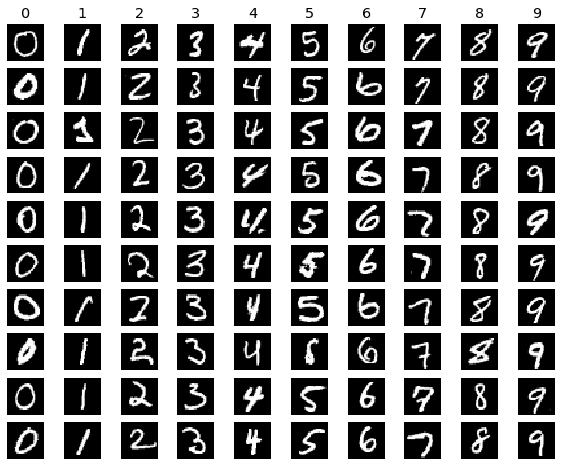

In [76]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(dataset.target == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(data[idx].astype('uint8').reshape(28, 28))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [77]:
# scale the input data to the range [0, 1] and perform a train/test split
(trainX, testX, trainY, testY) = train_test_split(data/255.0, dataset.target.astype("int"), test_size=0.25, random_state=42)

# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

print('Training data shape: ', trainX.shape, trainX.dtype)
print('Training labels shape: ', trainY.shape, trainY.dtype)
print('Test data shape: ', testX.shape, testX.dtype)
print('Test labels shape: ', testY.shape, testY.dtype)

Training data shape:  (52500, 28, 28, 1) float64
Training labels shape:  (52500, 10) int64
Test data shape:  (17500, 28, 28, 1) float64
Test labels shape:  (17500, 10) int64


In [78]:
from classifiers.lenet5 import LeNet5

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet5().build()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 6s 115us/step - loss: 1.5819 - acc: 0.4861 - val_loss: 0.6965 - val_acc: 0.7753
Epoch 2/20
52500/52500 [==============================] - 6s 107us/step - loss: 0.3527 - acc: 0.8935 - val_loss: 0.3368 - val_acc: 0.8933
Epoch 3/20
52500/52500 [==============================] - 6s 106us/step - loss: 0.2341 - acc: 0.9285 - val_loss: 0.7328 - val_acc: 0.7593
Epoch 4/20
52500/52500 [==============================] - 6s 107us/step - loss: 0.1840 - acc: 0.9457 - val_loss: 0.1619 - val_acc: 0.9514
Epoch 5/20
52500/52500 [==============================] - 6s 106us/step - loss: 0.1510 - acc: 0.9542 - val_loss: 0.1354 - val_acc: 0.9577
Epoch 6/20
52500/52500 [==============================] - 6s 106us/step - loss: 0.1292 - acc: 0.9610 - val_loss: 0.1791 - val_acc: 0.9429
Epoch 7/20
52500/52500 [==============================] - 6s 107us/st

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
__________

In [80]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in labelBinarizer.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1677
           1       0.98      0.99      0.99      1935
           2       0.98      0.97      0.98      1767
           3       0.94      0.99      0.97      1766
           4       0.99      0.98      0.99      1691
           5       0.98      0.97      0.97      1653
           6       0.99      0.98      0.99      1754
           7       0.98      0.98      0.98      1846
           8       0.96      0.97      0.96      1702
           9       0.97      0.96      0.97      1709

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



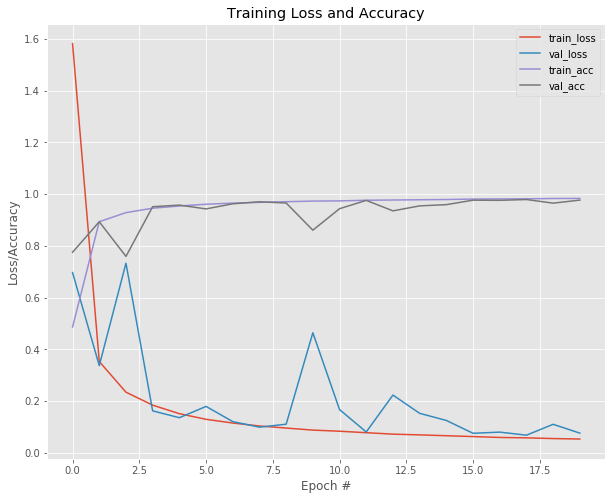

In [81]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done